<a href="https://colab.research.google.com/github/Hailsarah/data-science-course/blob/main/DataViz/DataViz_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Data Visualization

* Name: Nabilah Sarah 
* cita-cita masa kecil: Astronot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# please import as much as you need

In [ ]:
#import from the json file
import os

os.environ['KAGGLE_USERNAME'] = "nabilahsarahazhar" # username from the json file
os.environ['KAGGLE_KEY'] = "d0d89c003f0522bb646f208e0ebd4e02" # key from the json file
!kaggle datasets download -d blastchar/telco-customer-churn #download HR Analytics zip dataset dari kaggle
!unzip -q "/content/telco-customer-churn.zip"  #unzip dataset


telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# read your data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [ ]:
# your code goes here!
dfg = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index().sort_values(by= 'MonthlyCharges', ascending=False, ignore_index = True)
dfg

,PaymentMethod,MonthlyCharges
0,Electronic check,76.255814
1,Bank transfer (automatic),67.192649
2,Credit card (automatic),66.512385
3,Mailed check,43.917060


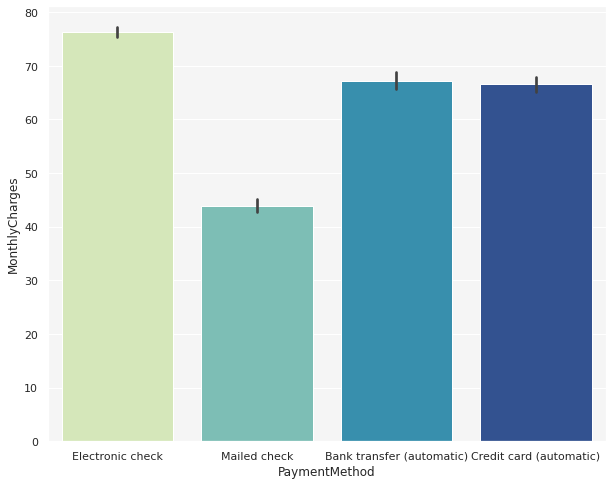

In [ ]:
import numpy as np
plt.figure(figsize=(10,8))
sns.barplot(x = 'PaymentMethod', y= 'MonthlyCharges', data=df, estimator=np.average, palette ='YlGnBu'); #average, sum

Jadi, dari plot di atas, dapat disimpulkan bahwa...

In [ ]:
print("Payment method yang memiliki monthly charge terbesar yaitu "+ str(dfg['PaymentMethod'].iloc[0])+ " dengan monthly charge sebesar "+ str(dfg['MonthlyCharges'].iloc[0]))

Payment method yang memiliki monthly charge terbesar yaitu Electronic check dengan monthly charge sebesar 76.25581395348837


$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [ ]:
# your code goes here!
tenure_list = [] #list kosong

for i, k in df.iterrows():
 
    s1 = k['tenure'] < 21 #True or False #True or False
    s3 = k['tenure'] > 40
    if s1: #true and true
        tenure_list.append('low_tenure')
    elif s3:
        tenure_list.append('high_tenure')
            
    else:
        tenure_list.append('medium_tenure')

In [ ]:
len(tenure_list)

7043

In [ ]:
df['tenure_group'] = tenure_list #initiate new column
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,medium_tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure


In [ ]:
dft = df.groupby('tenure_group')['customerID'].nunique().reset_index().sort_values(by= 'customerID', ascending=False, ignore_index = True)
dft

,tenure_group,customerID
0,low_tenure,2878
1,high_tenure,2757
2,medium_tenure,1408


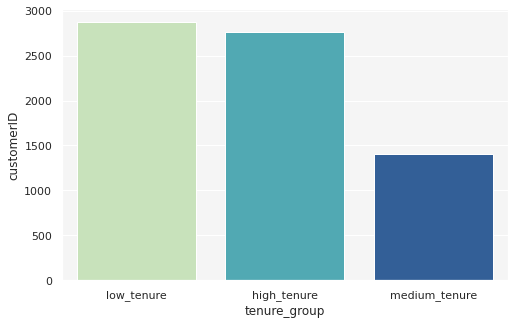

In [ ]:
plt.figure(figsize=(8,5 )) #8,5 10,8 15,10
sns.barplot(x = 'tenure_group', y= 'customerID', data= dft, palette ='YlGnBu')

Jadi, dari plot di atas, kami menyimpulkan bahwa...

In [ ]:
print("Tenure group yang memiliki customer terbanyak yaitu "+ str(dft['tenure_group'].iloc[0])+ " dengan customer sebanyak "+ str(dft['customerID'].iloc[0]) +" user")

Tenure group yang memiliki customer terbanyak yaitu low_tenure dengan customer sebanyak 2878 user


$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [ ]:
 df['customerID'].unique()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,partner_dependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low_tenure,YesNo
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,medium_tenure,NoNo
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low_tenure,NoNo
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high_tenure,NoNo
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low_tenure,NoNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,medium_tenure,YesYes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,high_tenure,YesYes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,low_tenure,YesYes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,low_tenure,YesNo


In [ ]:
dfs = df.groupby(['SeniorCitizen','PhoneService'])['customerID'].nunique().reset_index().sort_values(by= 'customerID', ascending=False, ignore_index = True)
dfs.rename(columns = {'customerID':'total_customer'}, inplace = True)
dfs

,SeniorCitizen,PhoneService,total_customer
0,0,Yes,5323
1,1,Yes,1038
2,0,No,578
3,1,No,104


In [ ]:
# your code goes here!

dfs[dfs['SeniorCitizen'].astype(str).str.contains('1')]



,SeniorCitizen,PhoneService,total_customer
1,1,Yes,1038
3,1,No,104


In [ ]:
dfs.rename(columns = {'customerID':'total_customer'}, inplace = True)
dfs

,SeniorCitizen,PhoneService,total_customer
0,0,Yes,5323
1,1,Yes,1038
2,0,No,578
3,1,No,104


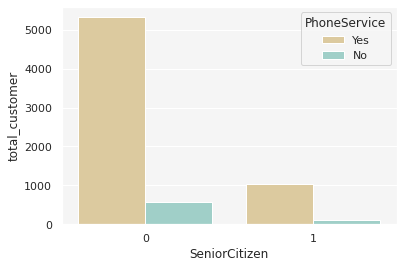

In [ ]:
sns.barplot(x = 'SeniorCitizen', y = 'total_customer', hue = 'PhoneService' , data = dfs, estimator = np.average, palette ='BrBG')

plt.show()


Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


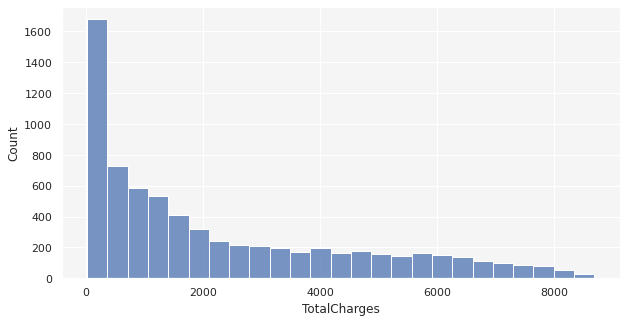

In [ ]:
# your code goes here!

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
plt.figure(figsize = (10,5))
sns.histplot(x='TotalCharges', data=df, palette ='BrBG');
df.info()

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

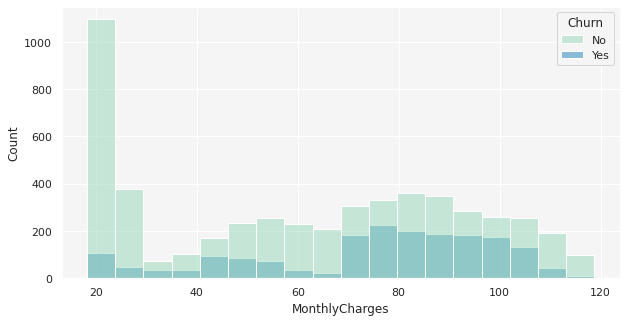

In [ ]:
# your code goes here!

df['Churn']
plt.figure(figsize = (10,5))
sns.histplot(x='MonthlyCharges', data=df, hue='Churn', palette ='YlGnBu');

Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

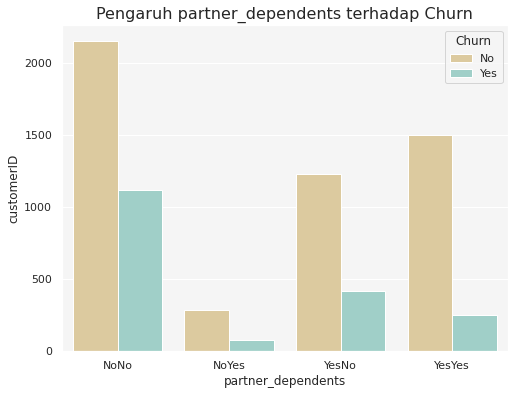

In [ ]:
# your code goes here!
df['partner_dependents'] = df['Partner'] + df['Dependents']

df_churn_partner= df.groupby(['partner_dependents', 'Churn']).agg({'customerID' : 'nunique'}).reset_index()
df_churn_partner

plt.figure(figsize=(8,6))
sns.barplot(x='partner_dependents', y='customerID', data=df_churn_partner, hue='Churn',palette ='BrBG');

plt.title('Pengaruh partner_dependents terhadap Churn', fontsize = 16);



Jadi, dari plot di atas, dapat disimpulkan bahwa...

* NoNo = Tidak memiliki pasangan dan tidak tanggungan
* NoYes = Tidak memiliki pasangan, namun memiliki tanggungan
* YesNo = Memiliki pasangan dan tidak ada tanggungan
* YesYes = memiliki pasangan dan memiliki tanggungan

kesimpulan:
terdapat keterkaitan antara churn atau tidaknya customer dengan pasangan yang dimilikinya.





$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

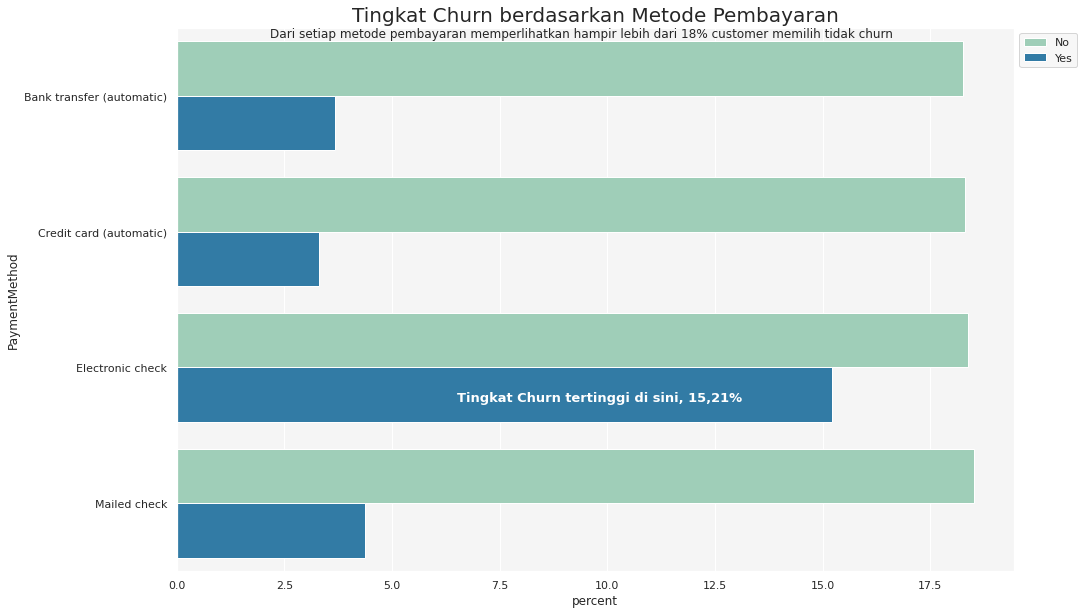

In [ ]:
# your code goes here!
df_payc= df.groupby(['PaymentMethod', 'Churn']).agg({'customerID' : 'nunique'}).reset_index()
df_payc['percent'] = (df_payc['customerID'] / df_payc['customerID'].sum()) * 100
df_payc

plt.figure(figsize=(15,10))
sns.set(rc={'axes.facecolor':'whitesmoke'})
plotting = sns.barplot(x='percent', y='PaymentMethod', data=df_payc, hue='Churn',palette ='YlGnBu');
plt.title('Tingkat Churn berdasarkan Metode Pembayaran', fontsize = 20);
plt.suptitle('Dari setiap metode pembayaran memperlihatkan hampir lebih dari 18% customer memilih tidak churn',x=0.5,y=0.88, fontsize=12)
plt.text(6.5, 2.25, "Tingkat Churn tertinggi di sini, 15,21%",fontsize=13,weight= 'bold',color='white');
plt.legend(loc = 2, bbox_to_anchor=(1,1));